In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine) 

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [45]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
#finding out the colums in measurement
measurement_columns = Measurement.__table__.columns.keys()
measurement_columns
Station_columns = Station.__table__.columns.keys()
Station_columns

['id', 'station', 'date', 'prcp', 'tobs']

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23',)

2016-08-23 0.0
2016-08-24 0.08
2016-08-25 0.08
2016-08-26 0.0
2016-08-27 0.0
2016-08-28 0.01
2016-08-29 0.0
2016-08-30 0.0
2016-08-31 0.13
2016-09-01 0.0
2016-09-02 0.0
2016-09-03 0.0
2016-09-04 0.03
2016-09-05 None
2016-09-06 None
2016-09-07 0.05
2016-09-08 0.0
2016-09-09 0.03
2016-09-10 0.0
2016-09-11 0.05
2016-09-12 0.0
2016-09-13 0.02
2016-09-14 1.32
2016-09-15 0.42
2016-09-16 0.06
2016-09-17 0.05
2016-09-18 0.0
2016-09-19 0.0
2016-09-20 0.0
2016-09-21 0.0
2016-09-22 0.02
2016-09-23 0.0
2016-09-24 0.0
2016-09-25 0.0
2016-09-26 0.06
2016-09-27 0.02
2016-09-28 0.0
2016-09-29 0.0
2016-09-30 0.0
2016-10-01 0.0
2016-10-02 0.0
2016-10-03 0.0
2016-10-04 0.0
2016-10-05 0.0
2016-10-06 0.0
2016-10-07 0.0
2016-10-08 0.0
2016-10-09 0.0
2016-10-10 0.0
2016-10-11 0.0
2016-10-12 0.0
2016-10-13 0.0
2016-10-14 0.0
2016-10-15 0.0
2016-10-16 0.0
2016-10-17 0.01
2016-10-18 0.0
2016-10-19 0.0
2016-10-20 0.0
2016-10-21 0.05
2016-10-22 0.15
2016-10-23 0.01
2016-10-24 0.0
2016-10-25 0.03
2016-10-26 0.0
20

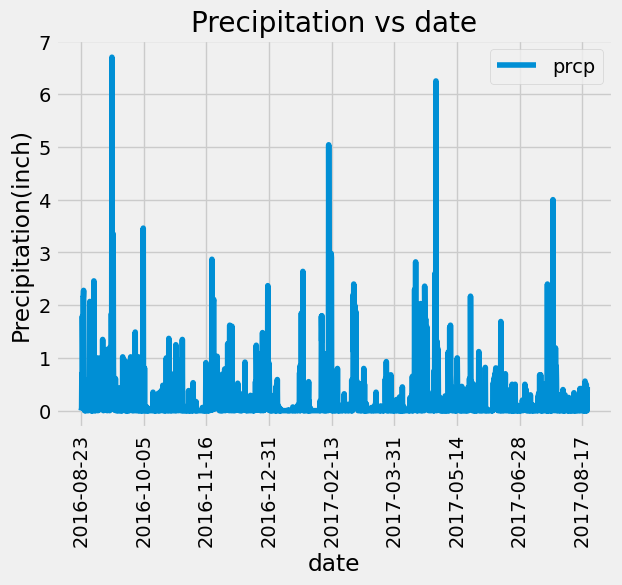

In [46]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database. 
 
# Calculate the date one year from the last date in data set.
lastyear_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
lastyear_date
# Perform a query to retrieve the data and precipitation scores
data_measurements = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=lastyear_date).all()

for data in data_measurements:
    print(data.date, data.prcp)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_measurements = pd.DataFrame(data_measurements, columns=["date", "prcp"])
#print(df_measurements)
# Sort the dataframe by date
df_measurements_clean = df_measurements.dropna()
sort_datedf = df_measurements_clean.sort_values("date")
sort_datedf.head()
#Use Pandas Plotting with Matplotlib to plot the data
figure1 = sort_datedf.plot(x="date", y="prcp", rot=90)
plt.xlabel("date")
plt.ylabel("Precipitation(inch)")
plt.title("Precipitation vs date")
plt.show()

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = sort_datedf["prcp"].describe()
print(summary_statistics)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number of stations in the dataset
stations_query = session.query(Station.station)
stations_query.count()

9

In [27]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations_active =(
    session.query(
        Measurement.station,
        func.count(Measurement.station).label("activity_count")
    )
    .join(Station, Measurement.station == Station.station)
    .group_by(Measurement.station, Station.name)
    .order_by(func.count(Measurement.station).desc())
    .all()
)
stations_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature_stats = (
    session.query(
        func.min(Measurement.tobs).label("min_temperature"),
        func.max(Measurement.tobs).label("max_temperature"),
        func.avg(Measurement.tobs).label("avg_temperature")
    ))
temperature_stats

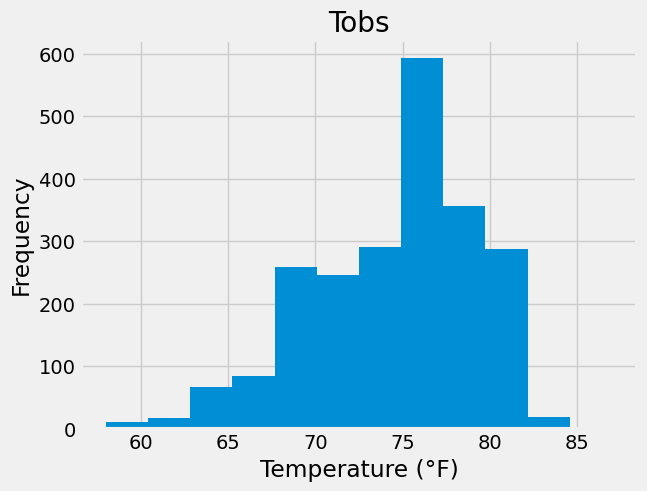

In [49]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = (
    session.query(Measurement.tobs)
    .filter(Measurement.date>=lastyear_date)
    .all()
)
temperature_df = pd.DataFrame(temperature_data, columns=["tobs"])
temperature_df.plot(kind="hist", bins=12, legend=False)
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.title(f"Tobs")
plt.show()


# Close Session

In [50]:
# Close Session
session.close()